# DengAI : DrivenData Competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
from scipy import stats
import plotly.plotly as py
plt.style.use('ggplot')
%matplotlib inline

In [2]:
labels = pd.read_csv('dengue_labels_train.csv')
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [3]:
train = pd.read_csv('dengue_features_train.csv')

In [4]:
train.shape

(1456, 24)

In [5]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
df = pd.merge(left=train , right=labels, left_on=['city', 'year', 'weekofyear'],
                      right_on=['city', 'year', 'weekofyear'],)

In [7]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [8]:
# The list of features for the correlation analysis
corr_list = [
    'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
    'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
    'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
    'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
    'station_min_temp_c', 'station_precip_mm', 'total_cases'
]

In [9]:
#Split the datasets based on the cities
#Training
sj_data = df[df['city']=='sj']
iq_data = df[df['city']=='iq']

In [10]:
sj_data.shape, iq_data.shape

((936, 25), (520, 25))

In [11]:
df.station_avg_temp_c.describe()

count    1413.000000
mean       27.185783
std         1.292347
min        21.400000
25%        26.300000
50%        27.414286
75%        28.157143
max        30.800000
Name: station_avg_temp_c, dtype: float64

### The train dataset
- There are 21 numerical features that can be considered across temperature, precipitation, vegetation index etc
- Scaling and normalization: Its clear from the dataset that the features need to scaled due to the different units like mm, C and K
- How do the cities sj and iq differ?
- **Missing** data: Need to deal with imputing the missing values esp for vegetation index

# Temperature Distribution of each City

/home/faisal/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/home/faisal/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less

/home/faisal/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'



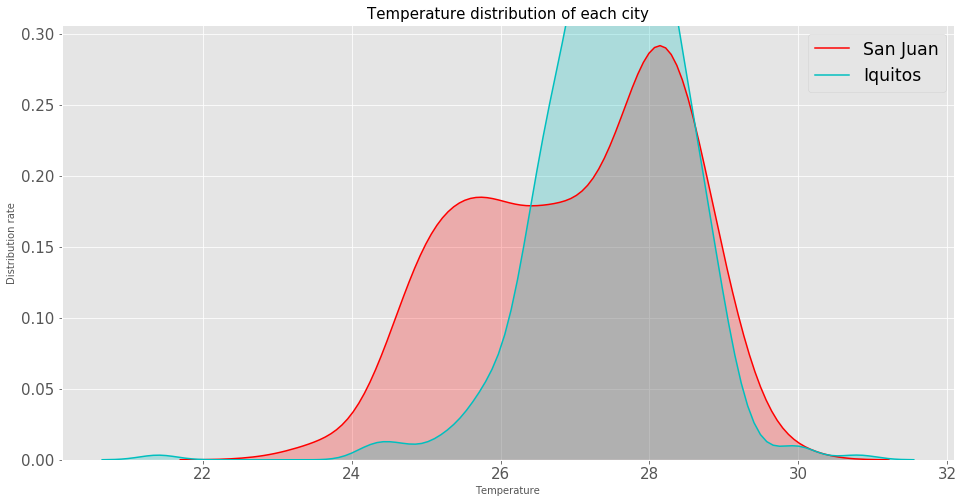

In [12]:
fig, ax = plt.subplots(figsize=(16,8))

ax = sns.kdeplot(sj_data.station_avg_temp_c, shade=True,c='r', label='San Juan')
ax = sns.kdeplot(iq_data.station_avg_temp_c, shade=True, c='c', label='Iquitos')


plt.xlabel('Temperature', fontsize=10)
plt.ylabel('Distribution rate', fontsize=10)
plt.title('Temperature distribution of each city', fontsize=15)
ax.legend(fontsize='xx-large')
ax.tick_params(labelsize=15);

# Precipitation Distribution of each City

/home/faisal/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/home/faisal/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less

/home/faisal/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'



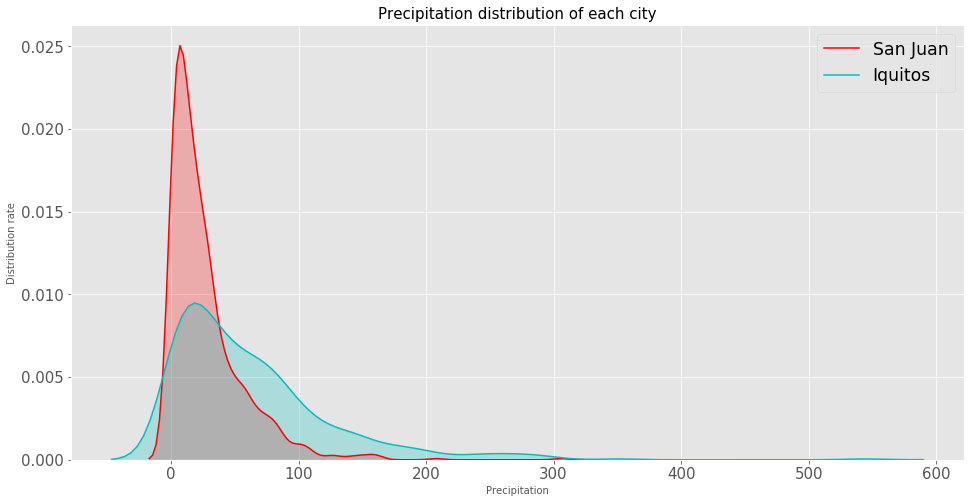

In [13]:
fig, ax = plt.subplots(figsize=(16,8))

ax = sns.kdeplot(sj_data.station_precip_mm, shade=True,c='r', label='San Juan')
ax = sns.kdeplot(iq_data.station_precip_mm, shade=True, c='c', label='Iquitos')

plt.xlabel('Precipitation', fontsize=10)
plt.ylabel('Distribution rate', fontsize=10)
plt.title('Precipitation distribution of each city', fontsize=15)
ax.legend(fontsize='xx-large')
ax.tick_params(labelsize=15);

# Evolution of dengue disease through time

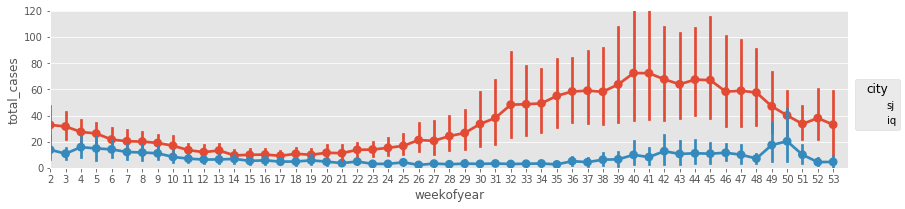

In [14]:
plt.figure(figsize=(10,10))
fig = sns.FacetGrid(df, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = df.weekofyear.max()
min_x = df.weekofyear.min()
fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 120))
fig.add_legend()

##### In San Juan, one clear trend is that the dengue virus becomes a lot more active at the other half of the year,
#### starting from July (week 28).
#### In Iquitos, the disease develop much slower, with its peak at the very end of the year (week 50).

# Overall trend

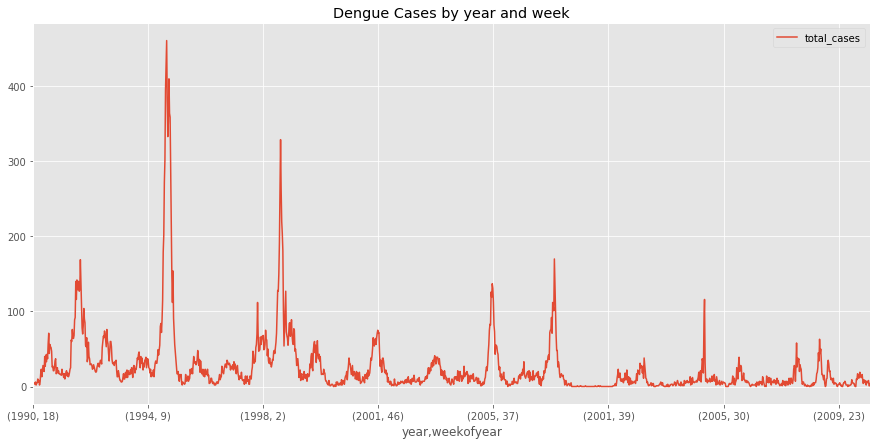

In [15]:
df.plot(kind='line',  x=['year', 'weekofyear'], y='total_cases' ,
                figsize=[15,7],title='Dengue Cases by year and week')

# Frequency of Total Dengue Cases in Iquitos

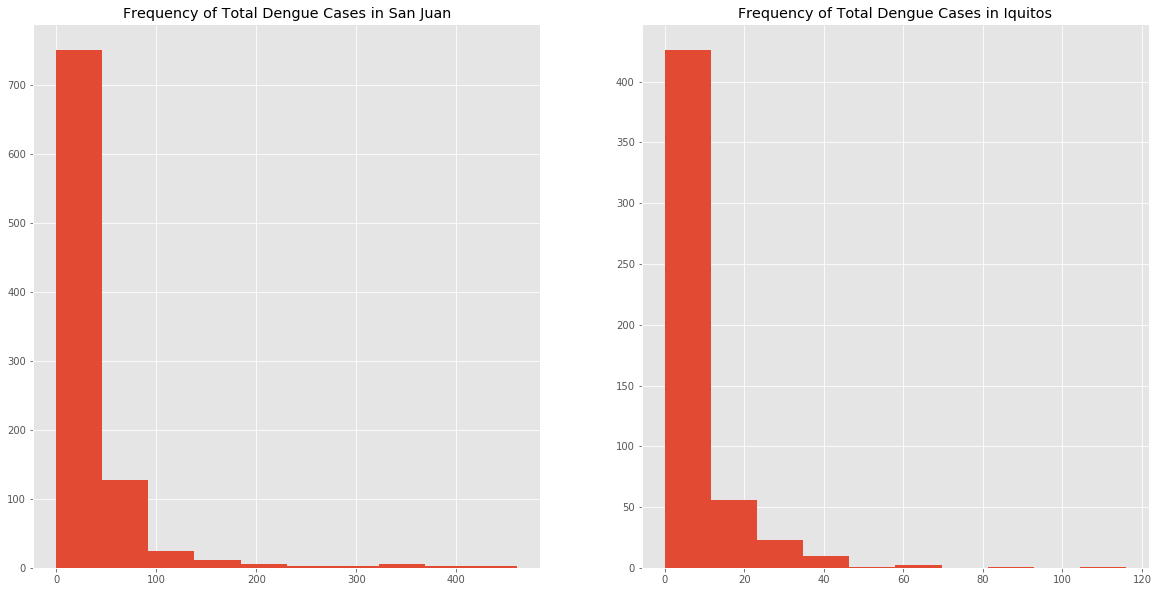

In [16]:

plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.hist(sj_data['total_cases'])
plt.title('Frequency of Total Dengue Cases in San Juan')

plt.subplot(1, 2, 2)
plt.hist(iq_data['total_cases'])
plt.title('Frequency of Total Dengue Cases in Iquitos')

plt.show()

# Correlation

In [17]:
sj_corr = sj_data[corr_list].corr()
iq_corr = iq_data[corr_list].corr()


In [18]:
sj_data.corr().describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,-0.003200,0.296130,0.066026,0.071087,0.054839,0.045874,0.248472,0.434961,0.432555,0.458193,...,0.277349,0.248472,0.461052,0.065373,0.430348,0.042452,0.381167,0.400007,0.157228,0.143208
std,0.294106,0.297859,0.275228,0.283942,0.286085,0.289420,0.317819,0.407869,0.406803,0.406454,...,0.339876,0.317819,0.404782,0.282481,0.394389,0.283816,0.335128,0.391815,0.298404,0.217304
min,-0.498367,-0.137093,-0.392312,-0.498367,-0.140286,-0.175239,-0.158479,-0.077457,-0.076375,-0.087787,...,-0.374868,-0.158479,-0.080840,-0.374868,-0.097312,-0.276963,-0.172907,-0.124651,-0.265303,-0.212690
25%,-0.152701,-0.014826,-0.048727,-0.048423,-0.066496,-0.084313,-0.000370,0.096805,0.079936,-0.005321,...,0.058238,-0.000370,-0.001233,-0.080764,0.110745,-0.147786,0.114512,0.017623,-0.035151,0.044699
50%,-0.002097,0.287134,-0.009248,-0.020595,-0.014863,-0.043488,0.224667,0.233912,0.222311,0.402744,...,0.306771,0.224667,0.410019,-0.009248,0.196617,0.018121,0.325748,0.224667,0.097849,0.144045
75%,0.094137,0.540565,0.078196,0.111979,0.009617,0.026066,0.406381,0.892109,0.887126,0.859543,...,0.484019,0.406381,0.861612,0.186624,0.866722,0.128204,0.690428,0.828274,0.286905,0.192216
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# San Juan Correlation Heatmap

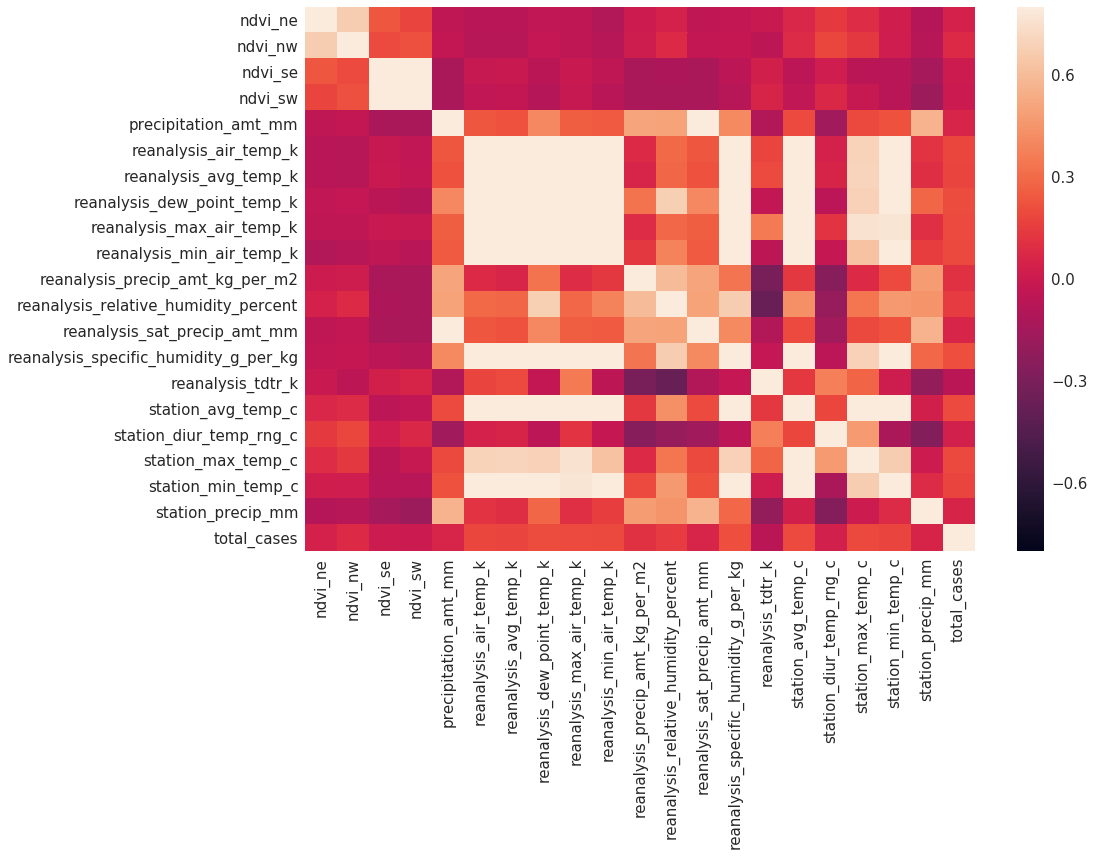

In [19]:
sns.set(font_scale=1.5)
plt.figure(figsize = (15,10))
sns.heatmap(sj_corr, vmin=-0.8, vmax=0.8)

# Iquitos Correlation Heatmap

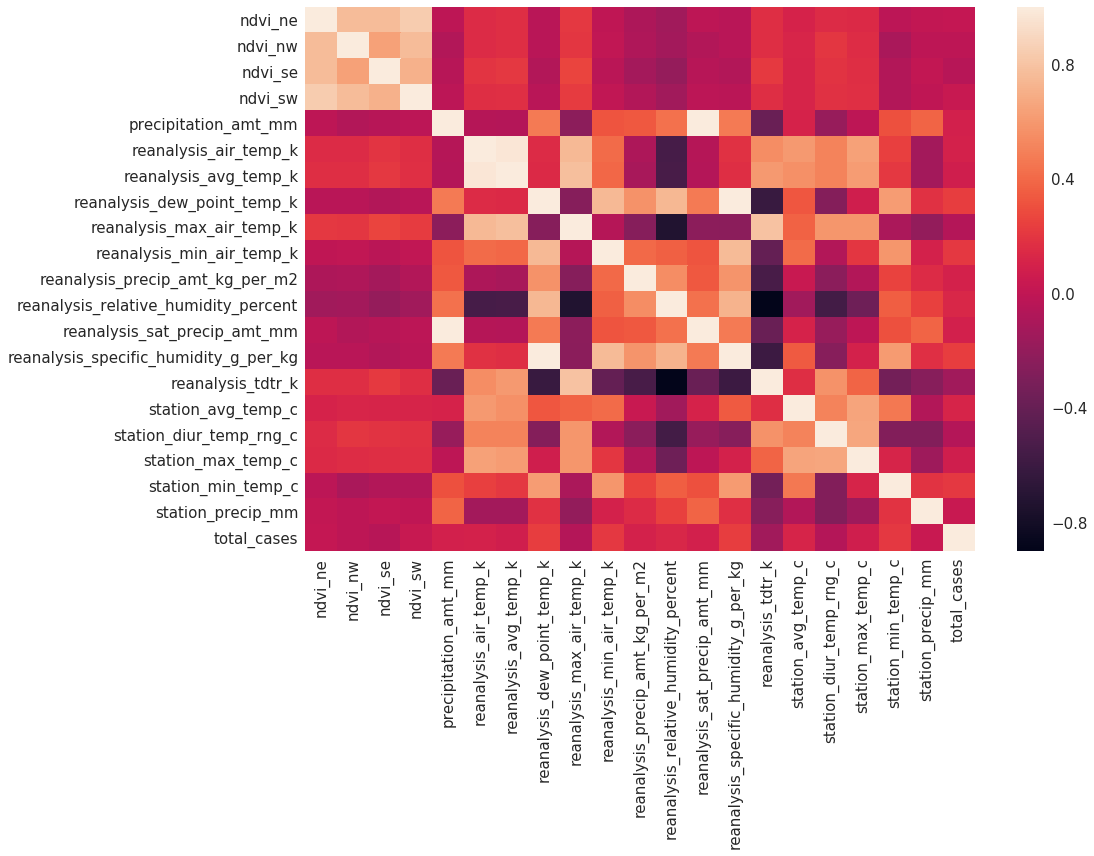

In [20]:
sns.set(font_scale=1.5)
plt.figure(figsize = (15,10))
sns.heatmap(iq_corr)

In [21]:
#Function to get list of most correlated features
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [23]:
# Most highly correlated
#San Juan
mosthighlycorrelated(sj_data,20)

,FirstVariable,SecondVariable,Correlation
0,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,1.000000
1,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,0.998532
2,reanalysis_air_temp_k,reanalysis_avg_temp_k,0.997495
3,reanalysis_air_temp_k,reanalysis_min_air_temp_k,0.942254
4,reanalysis_avg_temp_k,reanalysis_min_air_temp_k,0.939120
5,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,0.938952
6,reanalysis_air_temp_k,reanalysis_max_air_temp_k,0.935089
7,reanalysis_air_temp_k,reanalysis_specific_humidity_g_per_kg,0.904819
8,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,0.903287
9,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,0.898814


In [24]:
#Iquitos
mosthighlycorrelated(iq_data,20)

,FirstVariable,SecondVariable,Correlation
0,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,1.000000
1,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,0.997775
2,reanalysis_air_temp_k,reanalysis_avg_temp_k,0.973319
3,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,-0.896491
4,ndvi_ne,ndvi_sw,0.842784
5,reanalysis_max_air_temp_k,reanalysis_tdtr_k,0.799293
6,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,0.783955
7,ndvi_ne,ndvi_se,0.767745
8,ndvi_nw,ndvi_sw,0.764829
9,ndvi_ne,ndvi_nw,0.764407


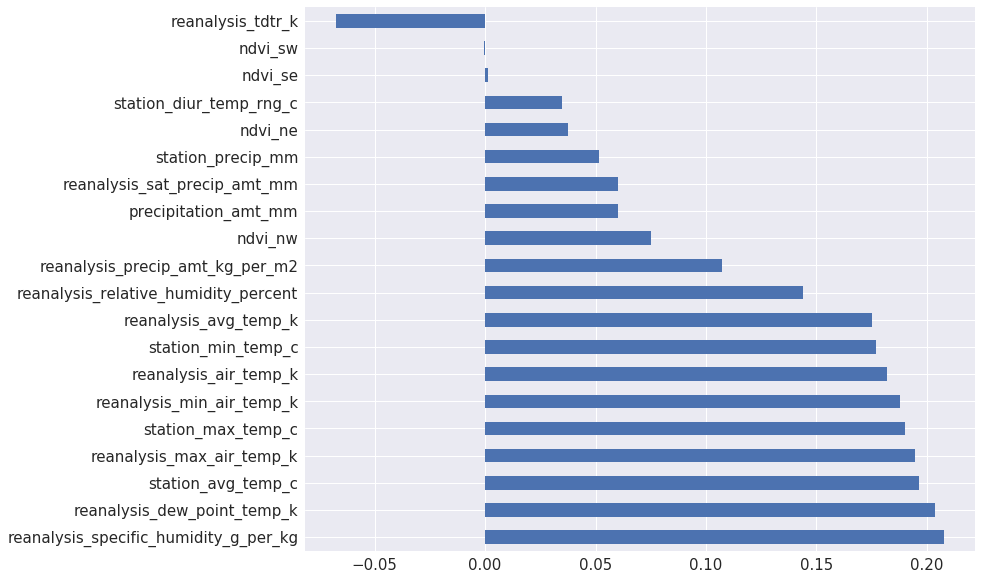

In [25]:
# San Juan
ax = plt.figure(figsize=(12,10))
(sj_corr
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)
sns.set(style="ticks", palette="colorblind")

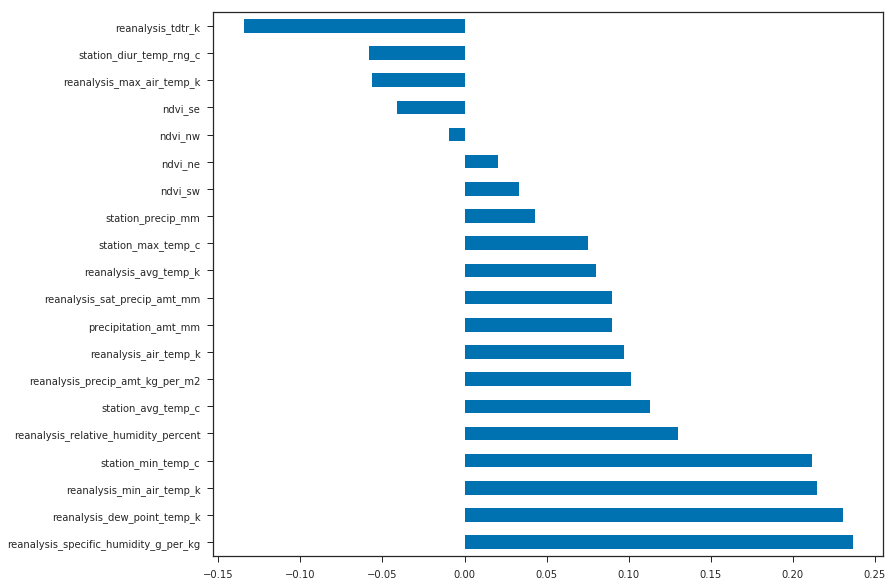

In [26]:
ax = plt.figure(figsize=(12,10))

sns.set(style="ticks", palette="colorblind")
# iq
(iq_corr
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)

# Hypothesis Testing

# T-Test

   - **1-sample t-test**
   - **Unpaired t-test**
   - **Paired t-test**

# 1-sample t-test (Also called 'Student's t-test')
The 1-sample t-test is used when we want to compare a sample mean to a population mean (which we already know). 

**Null Hypothesis (H0)** : The average of total_cases per week for the sample is equal to the average of the total_cases per week of whole population

**H1 ** : Not equal

In [27]:
df.head(1)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.9,29.4,20.0,16.0,4


In [28]:
Avg_CasesPerWeek = df['total_cases'].mean()

In [29]:
Avg_CasesPerWeek
type(Avg_CasesPerWeek)

float

$$ Population Average = 24.67 $$

### Taking 30 samples from the Population

Applying Test

In [30]:
df_sample = df.take(np.random.permutation(len(df))[:30])
one_sample_data = df_sample['total_cases']
one_sample = stats.ttest_1samp(list(one_sample_data), Avg_CasesPerWeek)
print (one_sample)

Ttest_1sampResult(statistic=-1.3529474429872104, pvalue=0.18652679637033986)


# t-test Result Conclution

Here we can conclude that the average no of cases per week of our sample is significantly indifferent (p <  0.05) from the average cases per week of whole population

# Unpaired t-test

The unpaired t method tests the null hypothesis that the population means related to two independent, random samples from an approximately normal distribution are equal

We'll assume the hypothesis that the samples mean related to San Juan & Iquitos (Taking both as independent : Infered from heatmap) are equal

### Taking Samples from both cities

In [31]:
sj_sample = sj_data.take(np.random.permutation(len(sj_data))[:30])
iq_sample = iq_data.take(np.random.permutation(len(iq_data))[:30])

### Means for the both cities

In [32]:
print (sj_data['total_cases'].mean())
print (iq_data['total_cases'].mean())

34.18055555555556
7.565384615384615


Applying test.
**Note** : If we suspect that the samples we are looking at come from populations with unequal variances we can set the equal_var parameter in the test to False. The results are then from Welch’s t-test, which does not assume equal population variance.

### Welch’s t-test

In [33]:
two_sample = stats.ttest_ind(sj_sample['total_cases'],iq_sample['total_cases'], equal_var=False)
print (two_sample)

Ttest_indResult(statistic=3.7305118086344544, pvalue=0.00075195702093791648)


### Unpaired t-test Conclusion
As the pvalue is 0.001 which is less than our threshold of alpha = 0.05. We conclude that the total no: of cases for both cities are indeed different

# Paired t-Test

We'll seperatly apply paired t-test for both cities San Juan & Iquitos. For each city, comparison of total_cases of dengue during the month of 'August & September' and rest of the months together

Parsing 'week_start_date' to datetime

In [34]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

In [35]:
df['month'] = df['week_start_date'].apply(lambda x: x.strftime('%B')) 

Selecting & randomly sample our data for both cities against months 'August' & 'September'

In [36]:
sj_data['week_start_date'] = pd.to_datetime(sj_data['week_start_date'])
sj_data['month'] = sj_data['week_start_date'].apply(lambda x: x.strftime('%B'))

/home/faisal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/faisal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [73]:
iq_data['week_start_date'] = pd.to_datetime(iq_data['week_start_date'])
iq_data['month'] = iq_data['week_start_date'].apply(lambda x: x.strftime('%B'))

/home/faisal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/faisal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [37]:
sj_sample_AugSep = sj_data[(sj_data.month == 'August') | (sj_data.month == 'September')]
sj_sample_otherMonths = sj_data[(sj_data.month != 'August') | (sj_data.month != 'September')]

Calculating mean for the above samples

In [38]:
print(sj_sample_AugSep['total_cases'].mean())
print(sj_sample_otherMonths['total_cases'].mean())

52.0
34.18055555555556


In [39]:
AugSep_sample = sj_sample_AugSep.take(np.random.permutation(len(sj_sample_AugSep))[:30])
Other_sample = sj_sample_otherMonths.take(np.random.permutation(len(sj_sample_otherMonths))[:30])

# Paired t-test 
The paired t-test is used when we have two sets of repeated measures i.e. we have measured some parameter on the same subjects at different times (or under different conditions).

In [44]:
paired_sample = stats.ttest_rel(AugSep_sample['total_cases'], Other_sample['total_cases'])
print(paired_sample)

Ttest_relResult(statistic=2.9939283984468377, pvalue=0.0055831074811852751)


We assumed that the number of dengue cases appeared more in month of August and September because of higher humidity and precipitation and above test proved that with pvalue less than 0.05

# Regression Model : Predicting Dengue Spread(total_cases)

Dropping unnecessary columns

In [55]:
df.drop('month', axis=1, inplace=True)

In [56]:
X = df.drop('total_cases', axis=1)
y = df['total_cases']                      

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state=2017)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((975, 24), (481, 24), (975,), (481,))

In [58]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [59]:


df_train = pd.concat([df_train.drop("city", axis=1),pd.get_dummies(df_train['city'])],axis=1)
df_test = pd.concat([df_test.drop("city", axis=1),pd.get_dummies(df_test['city'])],axis=1)                        



In [92]:


# re-assign X_train, test and y_train, test after missing value treatment
X_train = df_train.drop(df_train[['total_cases','week_start_date']], axis=1)
y_train = df_train['total_cases']

X_test = df_test.drop(df_test[['total_cases','week_start_date']], axis=1)
y_test = df_test['total_cases']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(975, 24) (481, 24) (975,) (481,)


# Baseline

In [61]:
baseline = y_train.mean()
baseline

24.288205128205128

In [62]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

dr = DummyRegressor(strategy='mean')
dr.fit(X_train,y_train)
print("baseline R^2 score is ",dr.score(X_test,y_test))

y_baseline = dr.predict(X_test)

print("Baseline RMSE = ",mean_absolute_error(y_test, y_baseline))

baseline R^2 score is  -0.000545987058818
Baseline RMSE =  23.1920742044
